In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.tree import  DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,r2_score

In [6]:
df=pd.read_csv("heart.csv")

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
y=df["target"]
x=df.drop("target",axis=1)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

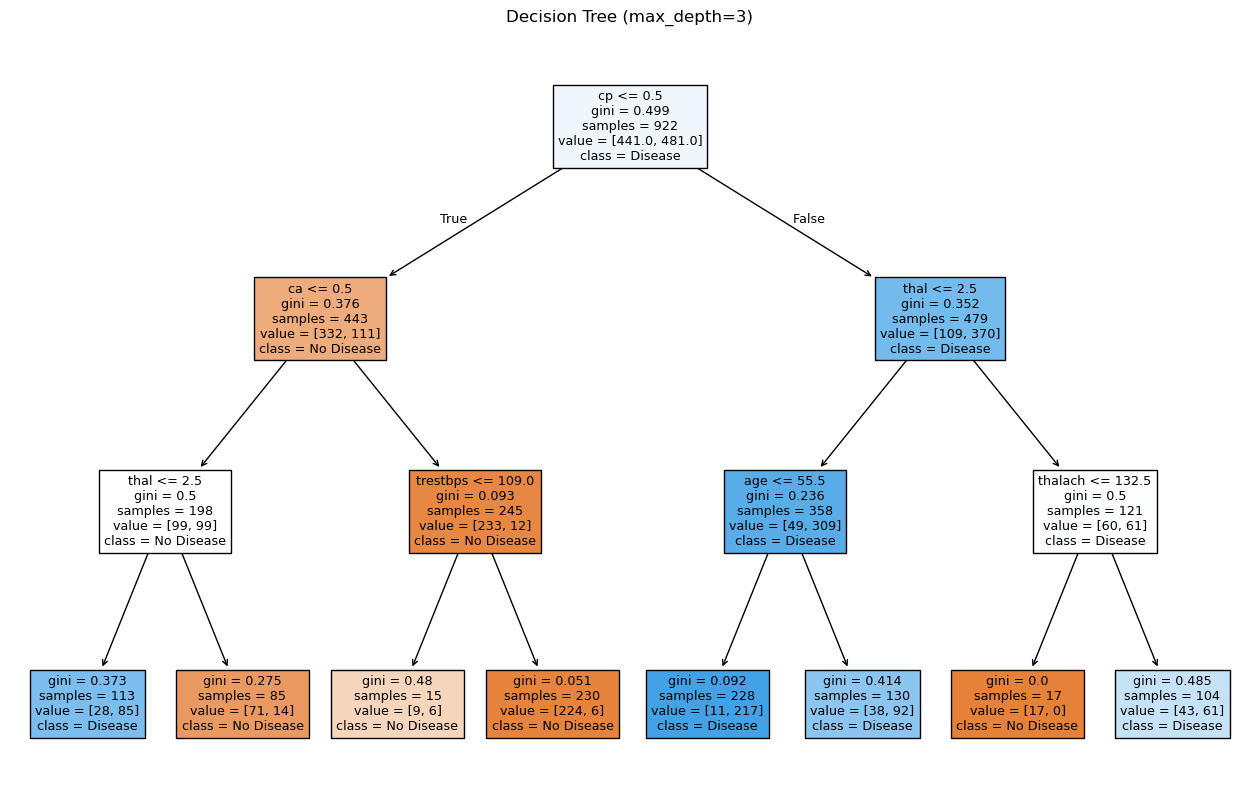

In [17]:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(x_train, y_train)

plt.figure(figsize=(16, 10))
plot_tree(tree_model, feature_names=x.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree (max_depth=3)")
plt.show()

In [18]:
for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print(f"Depth {depth} → Train: {train_score:.2f}, Test: {test_score:.2f}")


Depth 1 → Train: 0.76, Test: 0.75
Depth 2 → Train: 0.76, Test: 0.75
Depth 3 → Train: 0.84, Test: 0.78
Depth 4 → Train: 0.87, Test: 0.81
Depth 5 → Train: 0.93, Test: 0.83
Depth 6 → Train: 0.97, Test: 0.92
Depth 7 → Train: 0.98, Test: 0.95
Depth 8 → Train: 0.99, Test: 0.96
Depth 9 → Train: 1.00, Test: 0.97
Depth 10 → Train: 1.00, Test: 0.97


In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

print("Random Forest Accuracy:", rf_model.score(x_test, y_test))

Random Forest Accuracy: 0.970873786407767


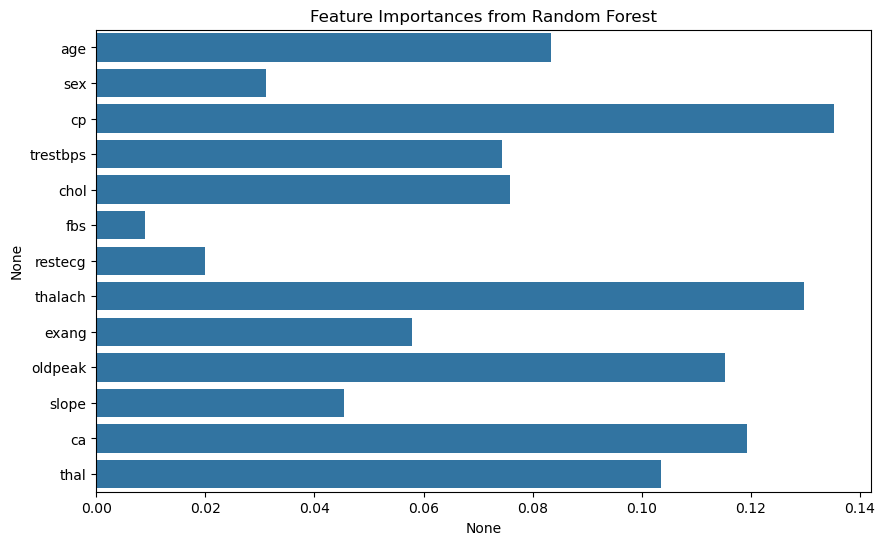

In [21]:
importances = pd.Series(rf_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances from Random Forest")
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Mean Accuracy: 0.9970731707317073


### 🌳 Decision Tree vs Random Forest - Heart Disease Dataset

- Decision Tree with depth 3 gave decent accuracy.
- Larger depth caused overfitting: train accuracy increased but test accuracy dropped.
- Random Forest performed better and was more stable.
- Top features included: 'cp', 'thalach', 'exang' (or others depending on importance chart).
- Cross-validation showed consistent accuracy, confirming model reliability.
